In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import textblob as tb

In [4]:
df = pd.read_csv('dataset.csv')
df.head()

/var/folders/dw/cpdcqrnn7c148h80q406v52r0000gn/T/ipykernel_9493/854447061.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dataset.csv')


,id,filtered,pending,Content,Rating,labels.merged.businessIdentifyingName,labels.verification.isVerified,labels.verification.createdDateTime,labels.verification.reviewSourceName,labels.verification.verificationSource,...,reply.updatedDate,consumersReviewCountOnSameDomain,consumersReviewCountOnSameLocation,Language,Brand,location.id,location.name,location.urlFormattedName,len,Year_Month
0,60db3726f9f487073c6e4521,False,False,"Selection is very poor for Desk, I understand ...",1,NaN,True,2021-06-29T15:07:18.000Z,EmbeddedBusinessGeneratedLinkForm,invitation,...,2021-07-01T16:28:13.389Z,2,NaN,en,nfm.com,NaN,NaN,NaN,21,2021-06
1,60aaaa92f9f4870a94aaeb3e,False,False,the website search system is not good.,1,NaN,True,2021-05-23T19:18:42.000Z,EmbeddedBusinessGeneratedLinkForm,invitation,...,NaN,1,NaN,en,nfm.com,NaN,NaN,NaN,7,2021-05
2,6443e80d746ca7dfea0e7f97,False,False,I tried to purchase last night and it wouldn’t...,1,NaN,True,2023-04-22T15:58:37.000Z,EmbeddedBusinessGeneratedLinkForm,invitation,...,NaN,1,NaN,en,nfm.com,NaN,NaN,NaN,25,2023-04
3,6227ef3a361b35c36d614281,False,False,Y’alls mobile UX is abysmal.,1,NaN,True,2022-03-09T00:05:14.000Z,EmbeddedBusinessGeneratedLinkForm,invitation,...,NaN,2,NaN,en,nfm.com,NaN,NaN,NaN,5,2022-03
4,5dd5fba4c845450600661393,False,False,Your prices aren’t close to Target or Amazon f...,1,NaN,True,2019-11-21T02:51:16.000Z,EmbeddedBusinessGeneratedLinkForm,invitation,...,NaN,1,NaN,en,nfm.com,NaN,NaN,NaN,20,2019-11


In [5]:
df

,id,filtered,pending,Content,Rating,labels.merged.businessIdentifyingName,labels.verification.isVerified,labels.verification.createdDateTime,labels.verification.reviewSourceName,labels.verification.verificationSource,...,reply.updatedDate,consumersReviewCountOnSameDomain,consumersReviewCountOnSameLocation,Language,Brand,location.id,location.name,location.urlFormattedName,len,Year_Month
0,60db3726f9f487073c6e4521,False,False,"Selection is very poor for Desk, I understand ...",1,NaN,True,2021-06-29T15:07:18.000Z,EmbeddedBusinessGeneratedLinkForm,invitation,...,2021-07-01T16:28:13.389Z,2,NaN,en,nfm.com,NaN,NaN,NaN,21,2021-06
1,60aaaa92f9f4870a94aaeb3e,False,False,the website search system is not good.,1,NaN,True,2021-05-23T19:18:42.000Z,EmbeddedBusinessGeneratedLinkForm,invitation,...,NaN,1,NaN,en,nfm.com,NaN,NaN,NaN,7,2021-05
2,6443e80d746ca7dfea0e7f97,False,False,I tried to purchase last night and it wouldn’t...,1,NaN,True,2023-04-22T15:58:37.000Z,EmbeddedBusinessGeneratedLinkForm,invitation,...,NaN,1,NaN,en,nfm.com,NaN,NaN,NaN,25,2023-04
3,6227ef3a361b35c36d614281,False,False,Y’alls mobile UX is abysmal.,1,NaN,True,2022-03-09T00:05:14.000Z,EmbeddedBusinessGeneratedLinkForm,invitation,...,NaN,2,NaN,en,nfm.com,NaN,NaN,NaN,5,2022-03
4,5dd5fba4c845450600661393,False,False,Your prices aren’t close to Target or Amazon f...,1,NaN,True,2019-11-21T02:51:16.000Z,EmbeddedBusinessGeneratedLinkForm,invitation,...,NaN,1,NaN,en,nfm.com,NaN,NaN,NaN,20,2019-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58120,67a0dfc66b05f6e33ade050c,False,False,Zafar was amazing! He was super helpful in hel...,5,NaN,True,2025-02-03T17:24:54.000Z,InvitationApi,invitation,...,NaN,3,1.0,en,www.scs.co.uk,ed86df11-3caf-4a3a-b891-06478dc0e32b,Bradford,bradford,49,2025-02
58121,67af5fb7ee042b465d9e74e5,False,False,Lee and his manager provided an outstanding se...,5,NaN,True,2025-02-14T17:22:31.000Z,InvitationApi,invitation,...,NaN,1,1.0,en,www.scs.co.uk,57dfb957-91f3-4310-ab18-ea79c8c98819,Kilmarnock,kilmarnock,70,2025-02
58122,679d2987212310ab13dd751b,False,False,The delivery drivers were really helpful getti...,5,NaN,False,2025-01-31T21:50:31.000Z,Organic,invitation,...,NaN,1,NaN,en,www.scs.co.uk,NaN,NaN,NaN,17,2025-01
58123,679897f775b5e4f52530828f,False,False,Sales representative knew stock and products w...,5,NaN,True,2025-01-28T10:40:23.000Z,InvitationApi,invitation,...,NaN,1,1.0,en,www.scs.co.uk,0e8c3084-5148-4def-bc34-618d48b075f5,North Shields,north-shields,23,2025-01


In [6]:
df['polarity'] = df['Content'].apply(lambda x: tb.TextBlob(x).sentiment.polarity)

In [7]:
df["polarity"]

0       -0.520000
1       -0.350000
2       -0.187500
3        0.000000
4        0.250000
           ...   
58120    0.616667
58121    0.227188
58122    0.200000
58123    1.000000
58124    0.555833
Name: polarity, Length: 58125, dtype: float64

<Axes: xlabel='Rating'>

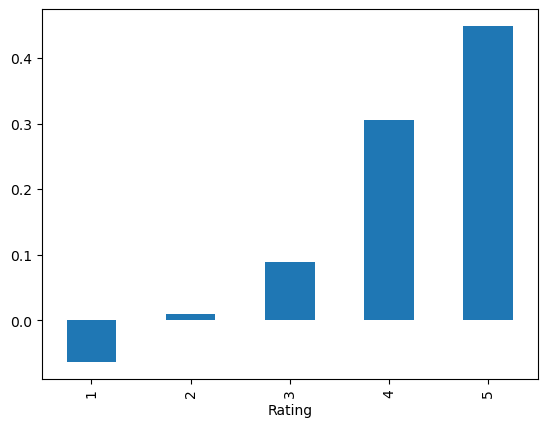

In [8]:
df.groupby('Rating')['polarity'].mean().plot(kind='bar')

In [9]:
df['subjectivity'] = df['Content'].apply(lambda x: tb.TextBlob(x).sentiment.subjectivity)

<Axes: xlabel='Rating'>

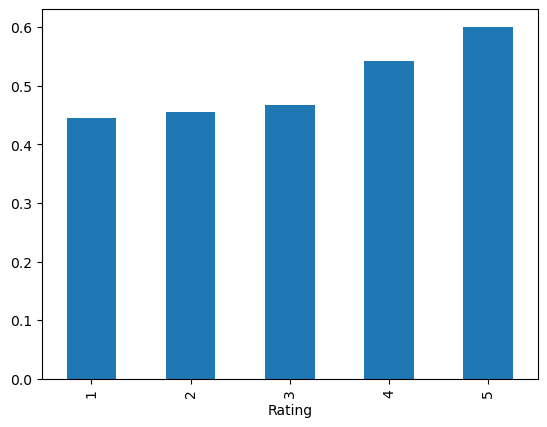

In [10]:
df.groupby('Rating')['subjectivity'].mean().plot(kind='bar')

<Axes: >

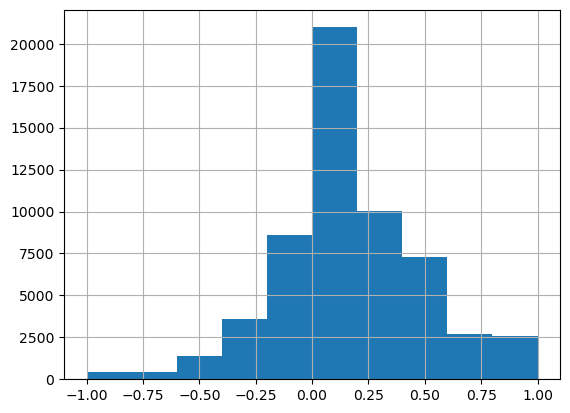

In [11]:
df['polarity'].hist()

<Axes: >

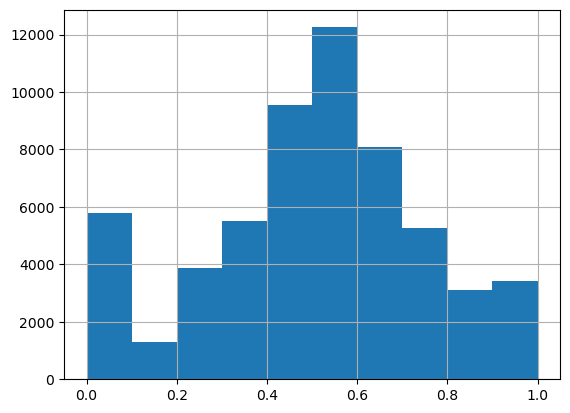

In [12]:
df['subjectivity'].hist()


In [13]:
import spacy
nlp = spacy.load("en_core_web_sm")


In [14]:
#Fonction pour extraire uniquement les localisations (GPE = pays/villes, LOC = lieux)
def extract_locations(text):
    doc = nlp(text)  # Analyse du texte avec SpaCy
    locations = [ent.text for ent in doc.ents if ent.label_ in ["GPE", "LOC"]]
    return locations if locations else None

def extract_polarity_words(text):
    blob = tb.TextBlob(text)
    words_with_tags = blob.tags  # Liste de tuples (mot, tag)

    # Extraire les adjectifs (JJ) et les verbes (VB)
    polarity_words = [word for word, tag in words_with_tags if tag.startswith("JJ") or tag.startswith("VB")]

    return polarity_words if polarity_words else None

In [15]:

df['locations'] = df['Content'].apply(extract_locations)
df['polarity_words'] = df['Content'].apply(extract_polarity_words)


In [16]:
df["polarity"].head()

0   -0.5200
1   -0.3500
2   -0.1875
3    0.0000
4    0.2500
Name: polarity, dtype: float64

<Axes: xlabel='polarity', ylabel='Count'>

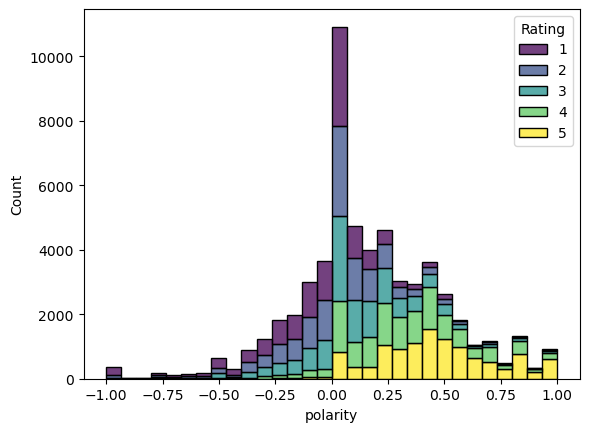

In [17]:
sns.histplot(data=df, x='polarity', hue='Rating', multiple="stack", bins=30, palette="viridis")

<Axes: xlabel='subjectivity', ylabel='Count'>

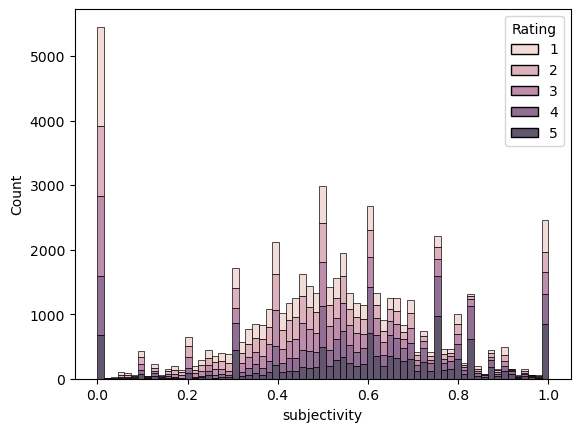

In [18]:
sns.histplot(data=df, x='subjectivity', hue='Rating', multiple='stack')

<Axes: xlabel='polarity', ylabel='subjectivity'>

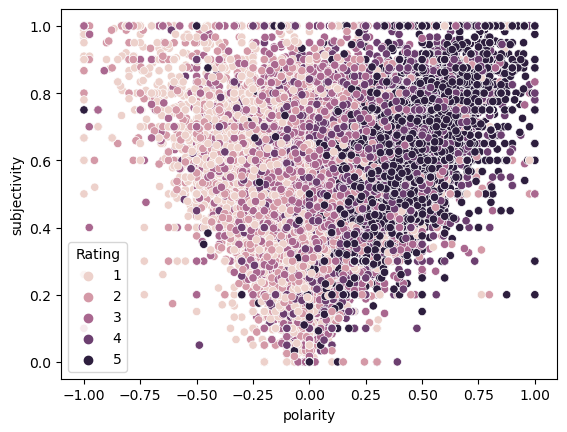

In [19]:
sns.scatterplot(data=df, x='polarity', y='subjectivity', hue='Rating')

In [20]:
correlation = df[['polarity', 'subjectivity']].corr().iloc[0,1]
print(f"🔍 Corrélation entre polarité et subjectivité : {correlation:.3f}")

🔍 Corrélation entre polarité et subjectivité : 0.293


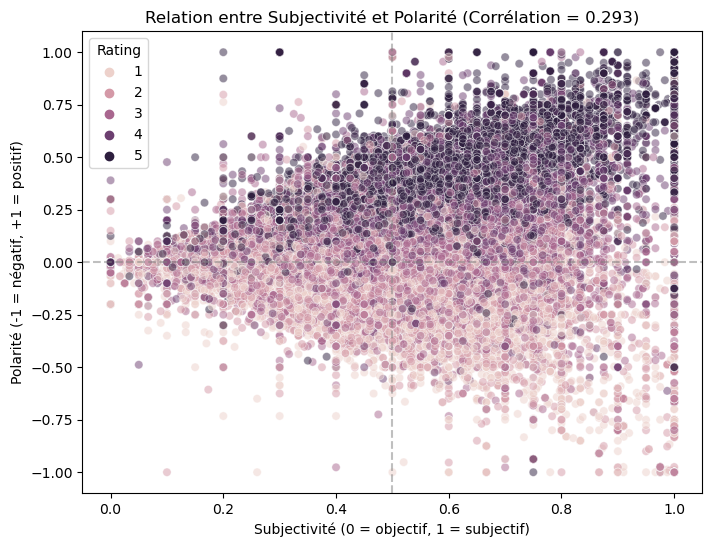

In [21]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='subjectivity', y='polarity', alpha=0.5, hue='Rating')
plt.title(f"Relation entre Subjectivité et Polarité (Corrélation = {correlation:.3f})")
plt.xlabel("Subjectivité (0 = objectif, 1 = subjectif)")
plt.ylabel("Polarité (-1 = négatif, +1 = positif)")
plt.axhline(0, color='gray', linestyle='dashed', alpha=0.5)  # Ligne horizontale à polarité neutre
plt.axvline(0.5, color='gray', linestyle='dashed', alpha=0.5)  # Ligne verticale à subjectivité médiane
plt.show()

In [22]:
df_extreme = df[(df['polarity'] > 0.5) | (df['polarity'] < -0.5)]
extreme_correlation = df_extreme[['polarity', 'subjectivity']].corr().iloc[0,1]
print(f"🔍 Corrélation pour les avis extrêmes : {extreme_correlation:.3f}")

🔍 Corrélation pour les avis extrêmes : -0.127


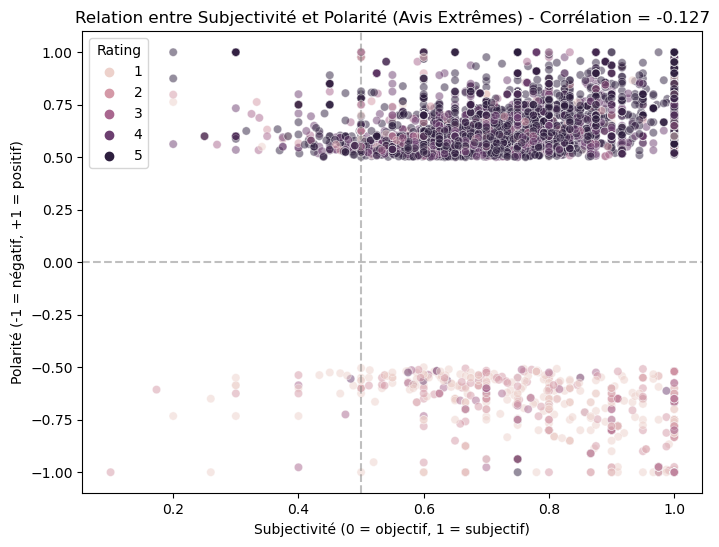

In [23]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_extreme, x='subjectivity', y='polarity', alpha=0.5, color='red', hue="Rating")
plt.title(f"Relation entre Subjectivité et Polarité (Avis Extrêmes) - Corrélation = {extreme_correlation:.3f}")
plt.xlabel("Subjectivité (0 = objectif, 1 = subjectif)")
plt.ylabel("Polarité (-1 = négatif, +1 = positif)")
plt.axhline(0, color='gray', linestyle='dashed', alpha=0.5)  # Ligne neutre
plt.axvline(0.5, color='gray', linestyle='dashed', alpha=0.5)  # Subjectivité médiane
plt.show()

In [24]:
df['word_count'] = df['Content'].apply(lambda x: len(x.split()))
print(df[['word_count', 'polarity']].corr())

            word_count  polarity
word_count     1.00000  -0.16644
polarity      -0.16644   1.00000


In [29]:
df

,id,filtered,pending,Content,Rating,labels.merged.businessIdentifyingName,labels.verification.isVerified,labels.verification.createdDateTime,labels.verification.reviewSourceName,labels.verification.verificationSource,...,location.id,location.name,location.urlFormattedName,len,Year_Month,polarity,subjectivity,locations,polarity_words,word_count
0,60db3726f9f487073c6e4521,False,False,"Selection is very poor for Desk, I understand ...",1,NaN,True,2021-06-29T15:07:18.000Z,EmbeddedBusinessGeneratedLinkForm,invitation,...,NaN,NaN,NaN,21,2021-06,-0.520000,0.780000,None,"[is, poor, understand, is, has]",21
1,60aaaa92f9f4870a94aaeb3e,False,False,the website search system is not good.,1,NaN,True,2021-05-23T19:18:42.000Z,EmbeddedBusinessGeneratedLinkForm,invitation,...,NaN,NaN,NaN,7,2021-05,-0.350000,0.600000,None,"[website, is, good]",7
2,6443e80d746ca7dfea0e7f97,False,False,I tried to purchase last night and it wouldn’t...,1,NaN,True,2023-04-22T15:58:37.000Z,EmbeddedBusinessGeneratedLinkForm,invitation,...,NaN,NaN,NaN,25,2023-04,-0.187500,0.495139,None,"[tried, purchase, last, wouldn, using, same, s...",25
3,6227ef3a361b35c36d614281,False,False,Y’alls mobile UX is abysmal.,1,NaN,True,2022-03-09T00:05:14.000Z,EmbeddedBusinessGeneratedLinkForm,invitation,...,NaN,NaN,NaN,5,2022-03,0.000000,0.000000,None,"[alls, mobile, is, abysmal]",5
4,5dd5fba4c845450600661393,False,False,Your prices aren’t close to Target or Amazon f...,1,NaN,True,2019-11-21T02:51:16.000Z,EmbeddedBusinessGeneratedLinkForm,invitation,...,NaN,NaN,NaN,20,2019-11,0.250000,0.291667,None,"[’, exact, same, have, bought, more]",20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58120,67a0dfc66b05f6e33ade050c,False,False,Zafar was amazing! He was super helpful in hel...,5,NaN,True,2025-02-03T17:24:54.000Z,InvitationApi,invitation,...,ed86df11-3caf-4a3a-b891-06478dc0e32b,Bradford,bradford,49,2025-02,0.616667,0.804167,None,"[was, amazing, was, super, helping, fjnd, comp...",49
58121,67af5fb7ee042b465d9e74e5,False,False,Lee and his manager provided an outstanding se...,5,NaN,True,2025-02-14T17:22:31.000Z,InvitationApi,invitation,...,57dfb957-91f3-4310-ab18-ea79c8c98819,Kilmarnock,kilmarnock,70,2025-02,0.227188,0.519375,[SCS Kilmarnock],"[provided, outstanding, professional, great, h...",70
58122,679d2987212310ab13dd751b,False,False,The delivery drivers were really helpful getti...,5,NaN,False,2025-01-31T21:50:31.000Z,Organic,invitation,...,NaN,NaN,NaN,17,2025-01,0.200000,0.200000,None,"[were, helpful, getting, rainy, muddy]",17
58123,679897f775b5e4f52530828f,False,False,Sales representative knew stock and products w...,5,NaN,True,2025-01-28T10:40:23.000Z,InvitationApi,invitation,...,0e8c3084-5148-4def-bc34-618d48b075f5,North Shields,north-shields,23,2025-01,1.000000,1.000000,None,"[representative, knew, felt, informed.Wide, is...",23


In [30]:
df.to_csv('datasetF.csv', index=False)